# Emotion recognition- RAVDESS dataset

### File Summary

#### In total, the RAVDESS collection includes 7356 files (2880+2024+1440+1012 files).

#### File naming convention

##### Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics: 

#### Filename identifiers 

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

  Filename example: 02-01-06-01-02-01-12.mp4 

* Video-only (02)
* Speech (01)
* Fearful (06)
* Normal intensity (01)
* Statement "dogs" (02)
* 1st Repetition (01)
* 12th Actor (12)
* Female, as the actor ID number is even.

### Background

#### MFCCS- mel- frequency cepstrum coefficients

#### Computing the cepstrum:

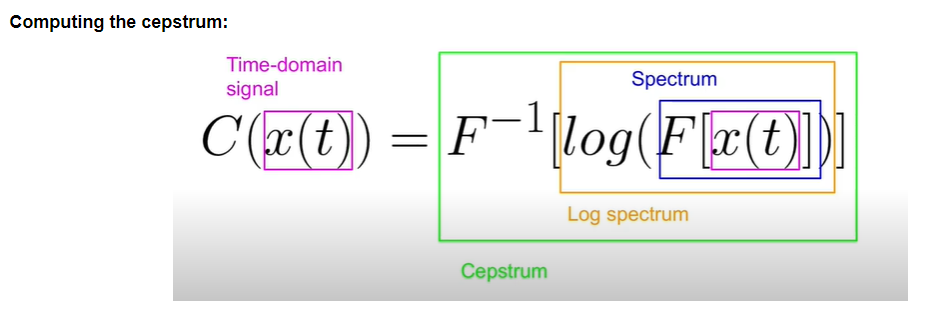

#### We're basically trasforming our sound wave to an absolute formation, then create a log which allows us to see the signal's Frequency VS it's Magnitude and allows us to examine periodicities and general trend as well. Lastly were performing an inverse transformation which results in a general spectrum of the signal (Quefrency VS Magnitude).

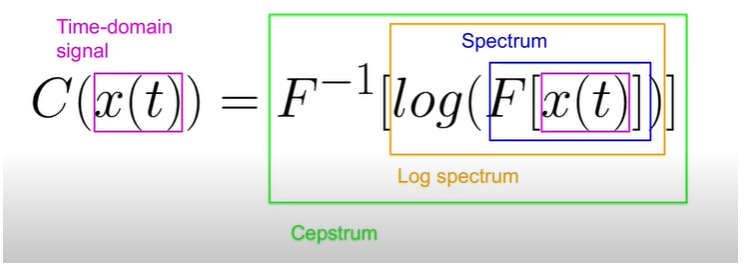

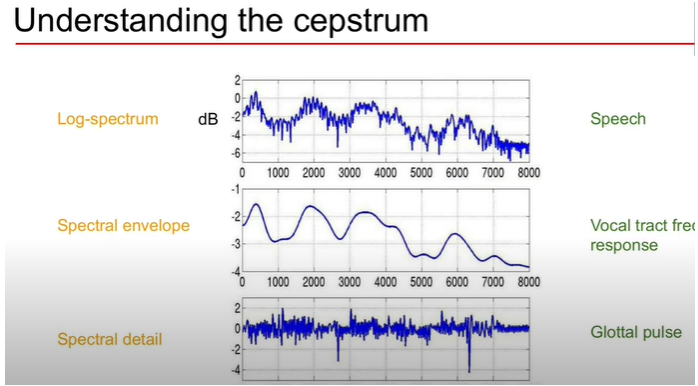

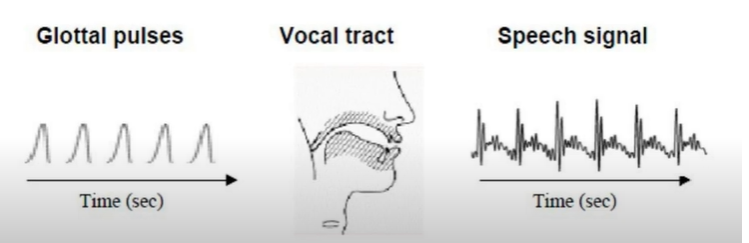

#### Speech = Convolution of vocal tract frequency response and Glottal pulse.

#### We are mostly interested in the Vocal tract, which contains the main knowledge that helps us understand our data (formants), and therefore we're looking for a way to seperate the Vocal tract from the Speech wave without having the Glottal pulse as well. We do that by applying a logarithm on the amplitude (audio is perceived logarithmically and not linearly), mel-scaling, and then a transformation (Discrete cosine transform).

#### Our result- the waves coefficients! (MFCCS)

### Plotting an example for a sound wave:

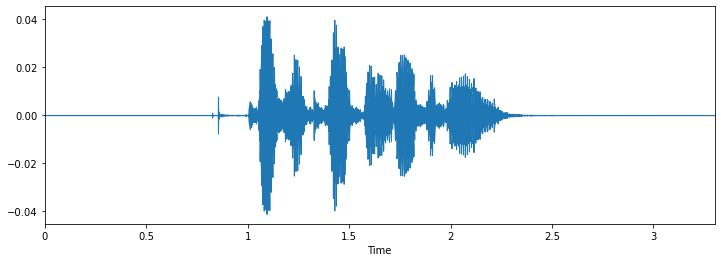

In [1]:
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
import numpy as np
from tqdm.notebook import tqdm
import glob

data, sampling_rate = librosa.load('D://ITC//final_project//data//data//Actor_01//03-01-01-01-01-01-01.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)
plt.show()

### Reading the data

In [2]:
lst = []
path = 'D://ITC//final_project//data'

for root, dirs, files in tqdm(os.walk(path)):
    for file in files:
        try:
            #Load librosa array, obtain mfcss, store the file and the mfcss information in a new array
            X, sample_rate = librosa.load(os.path.join(root,file), res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
            # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
            file = int(file[7:8])
            arr = mfccs, file
            lst.append(arr)
          # If the file is not valid, skip it
        except ValueError:
            continue

0it [00:00, ?it/s]

C:\Users\Talba\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [3]:
X, y = zip(*lst)

In [7]:
X = np.asarray(X)
y = np.asarray(y)

X.shape, y.shape

((2628, 40), (2628,))

In [5]:
# import pickle

# with open('d://ITC//final_project//x.pickle', 'wb') as f:
#     pickle.dump(X, f)
# with open('d://ITC//final_project//y.pickle', 'wb') as f:
#     pickle.dump(y, f)

In [5]:
# import pickle

# with open('d://ITC//final_project//x.pickle', 'rb') as f:
#     X = pickle.load(f)
# with open('d://ITC//final_project//y.pickle', 'rb') as f:
#     y = pickle.load(f)

In [8]:
set(y)

{1, 2, 3, 4, 5, 6, 7, 8}

In [9]:
emotions = {1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'happy', 6:'fearful', 7:'disgust', 8:'surprised'}

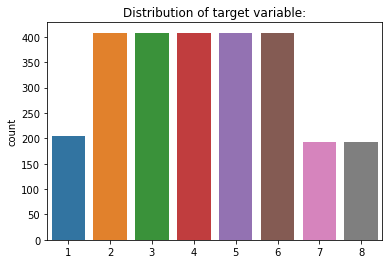

In [10]:
import seaborn as sns

plt.title('Distribution of target variable:')
sns.countplot(y)
plt.show()

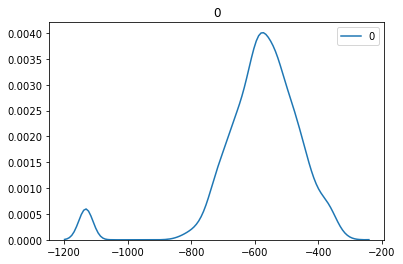

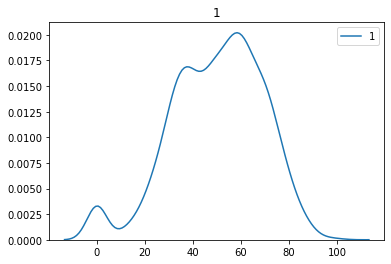

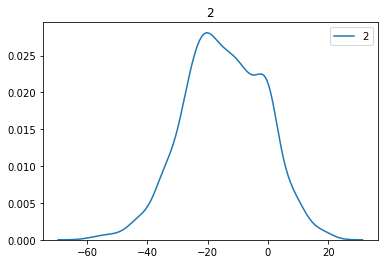

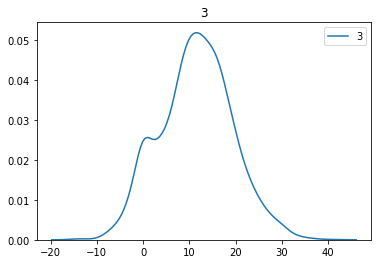

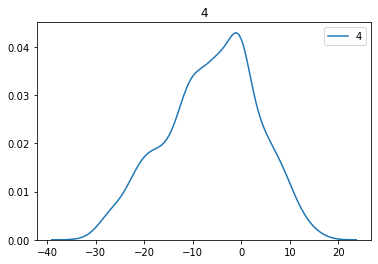

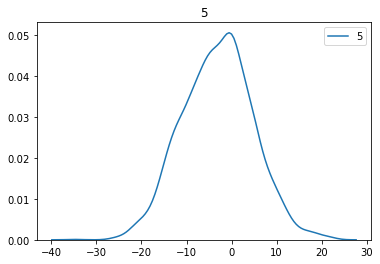

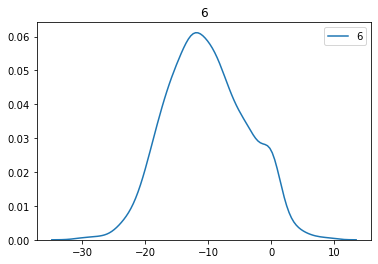

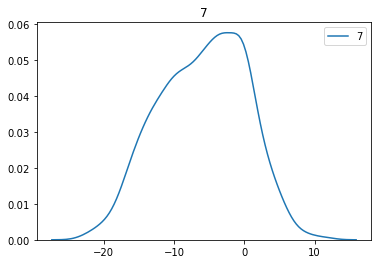

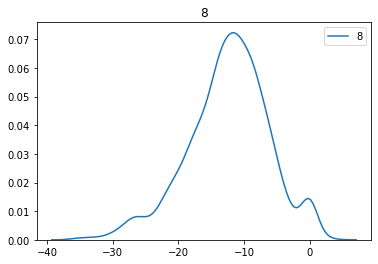

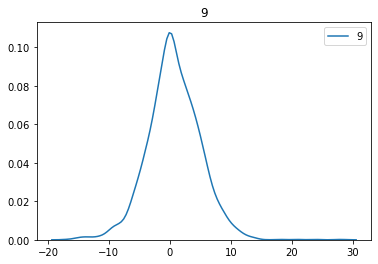

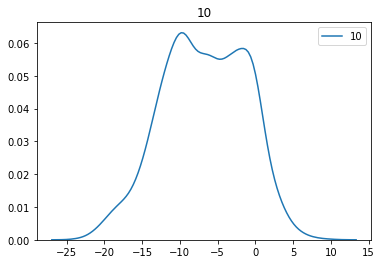

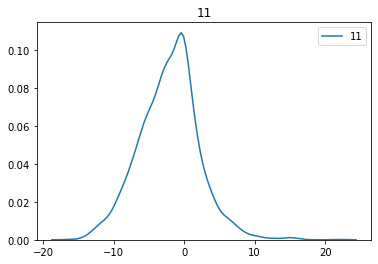

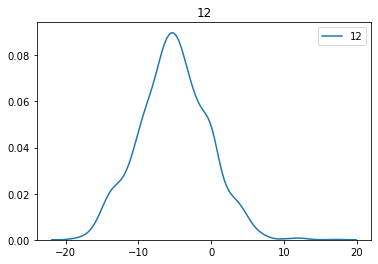

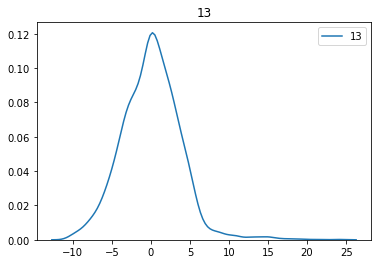

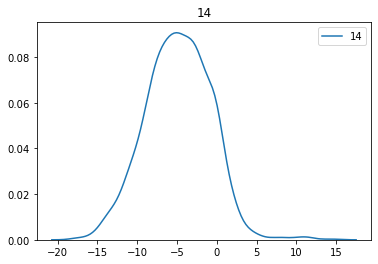

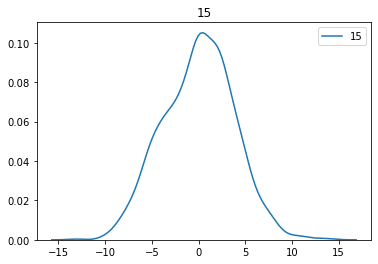

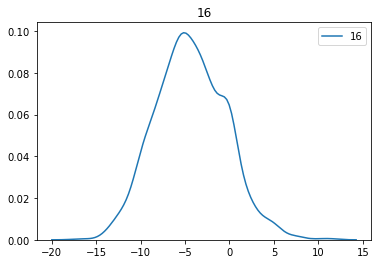

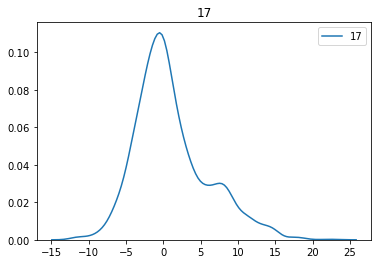

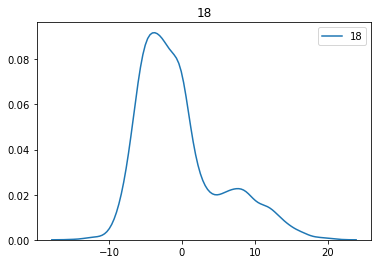

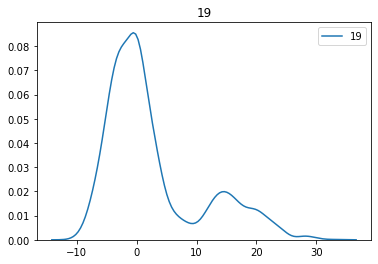

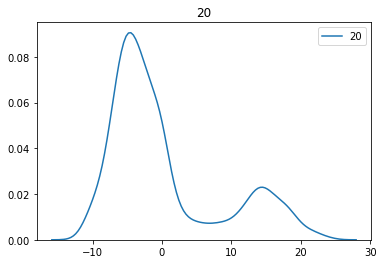

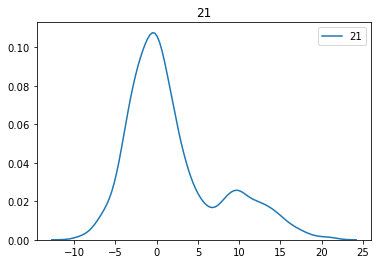

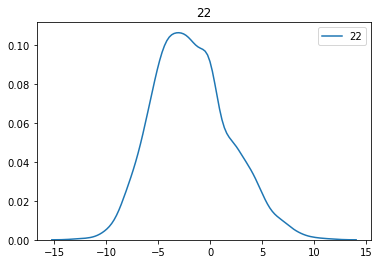

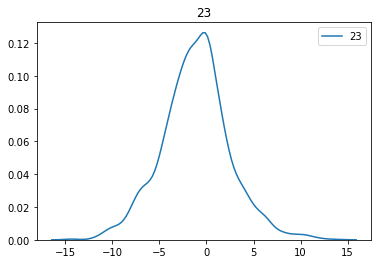

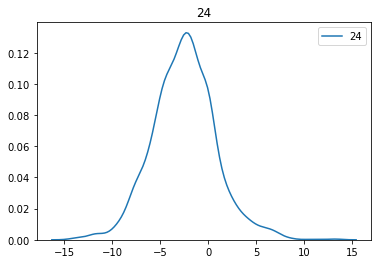

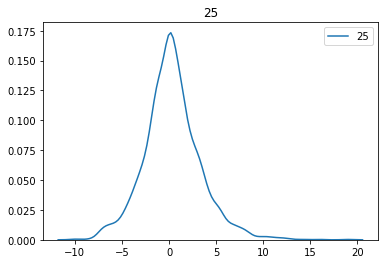

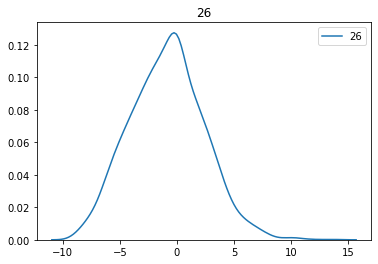

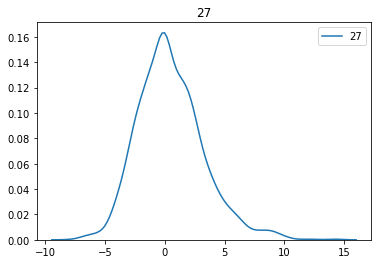

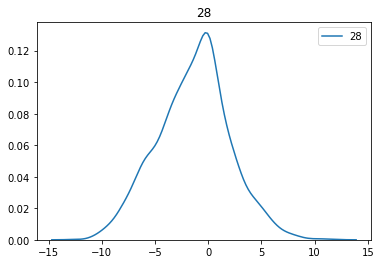

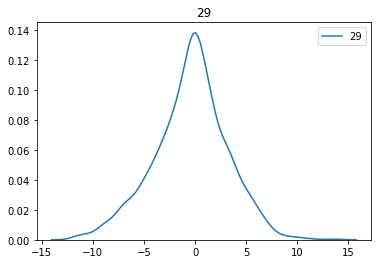

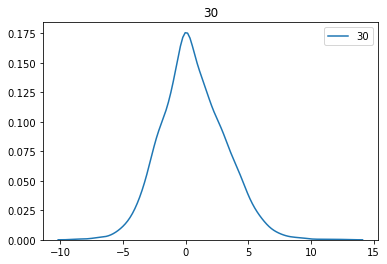

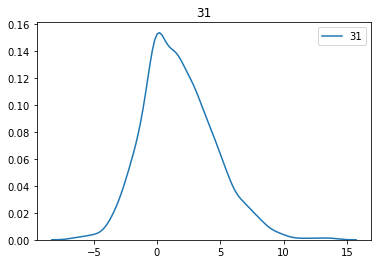

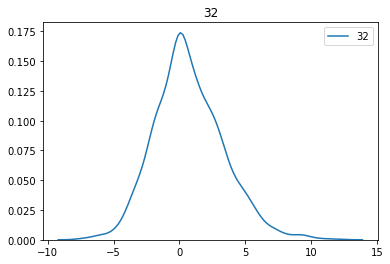

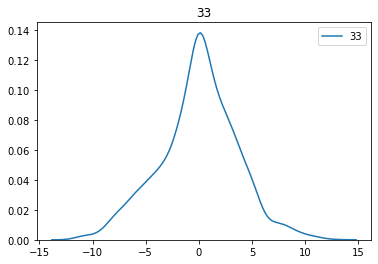

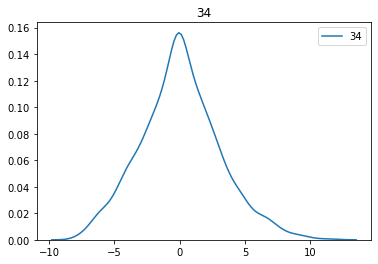

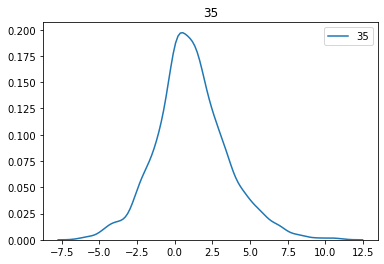

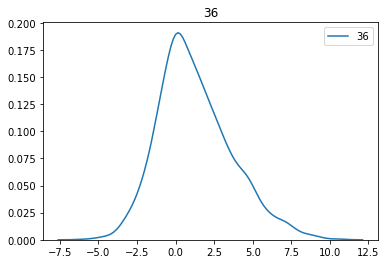

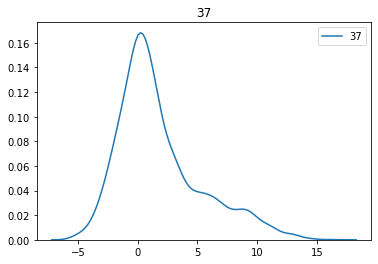

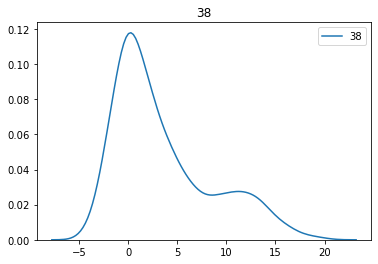

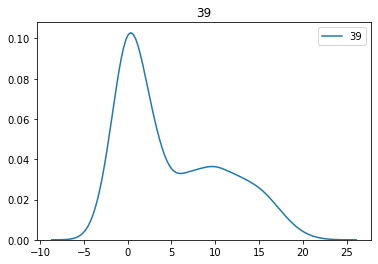

In [11]:
import pandas as pd

X_df = pd.DataFrame(X)
for i in X_df:
    plt.title(i)
    sns.kdeplot(X_df[i])
    plt.show()

### Spotting outliers:

In [10]:
for i in X_df:
    Q1 = X_df[i].quantile(0.25)
    Q3 = X_df[i].quantile(0.75)
    IQR = Q3 - Q1
    print(f'Outliers in {i}:')
    print(np.array((X_df[i] < (Q1 - 1.5 * IQR)) |(X_df[i] > (Q3 + 1.5 * IQR))).nonzero())

Outliers in 0:
(array([1151, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505,
       2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516,
       2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527,
       2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538,
       2539, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593,
       2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604,
       2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615,
       2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2626,
       2627], dtype=int64),)
Outliers in 1:
(array([], dtype=int64),)
Outliers in 2:
(array([ 313,  316,  317,  318,  340,  341,  343, 1676, 1677, 1678, 1679],
      dtype=int64),)
Outliers in 3:
(array([ 251,  343,  480,  485,  489,  490,  503,  507,  527,  605, 1085,
       1086, 1087, 1159, 1182, 1423], dtype=int64),)
Outliers in 4:
(array([2435], dtype=int64),)
Outliers in 5:
(array([ 489,  50

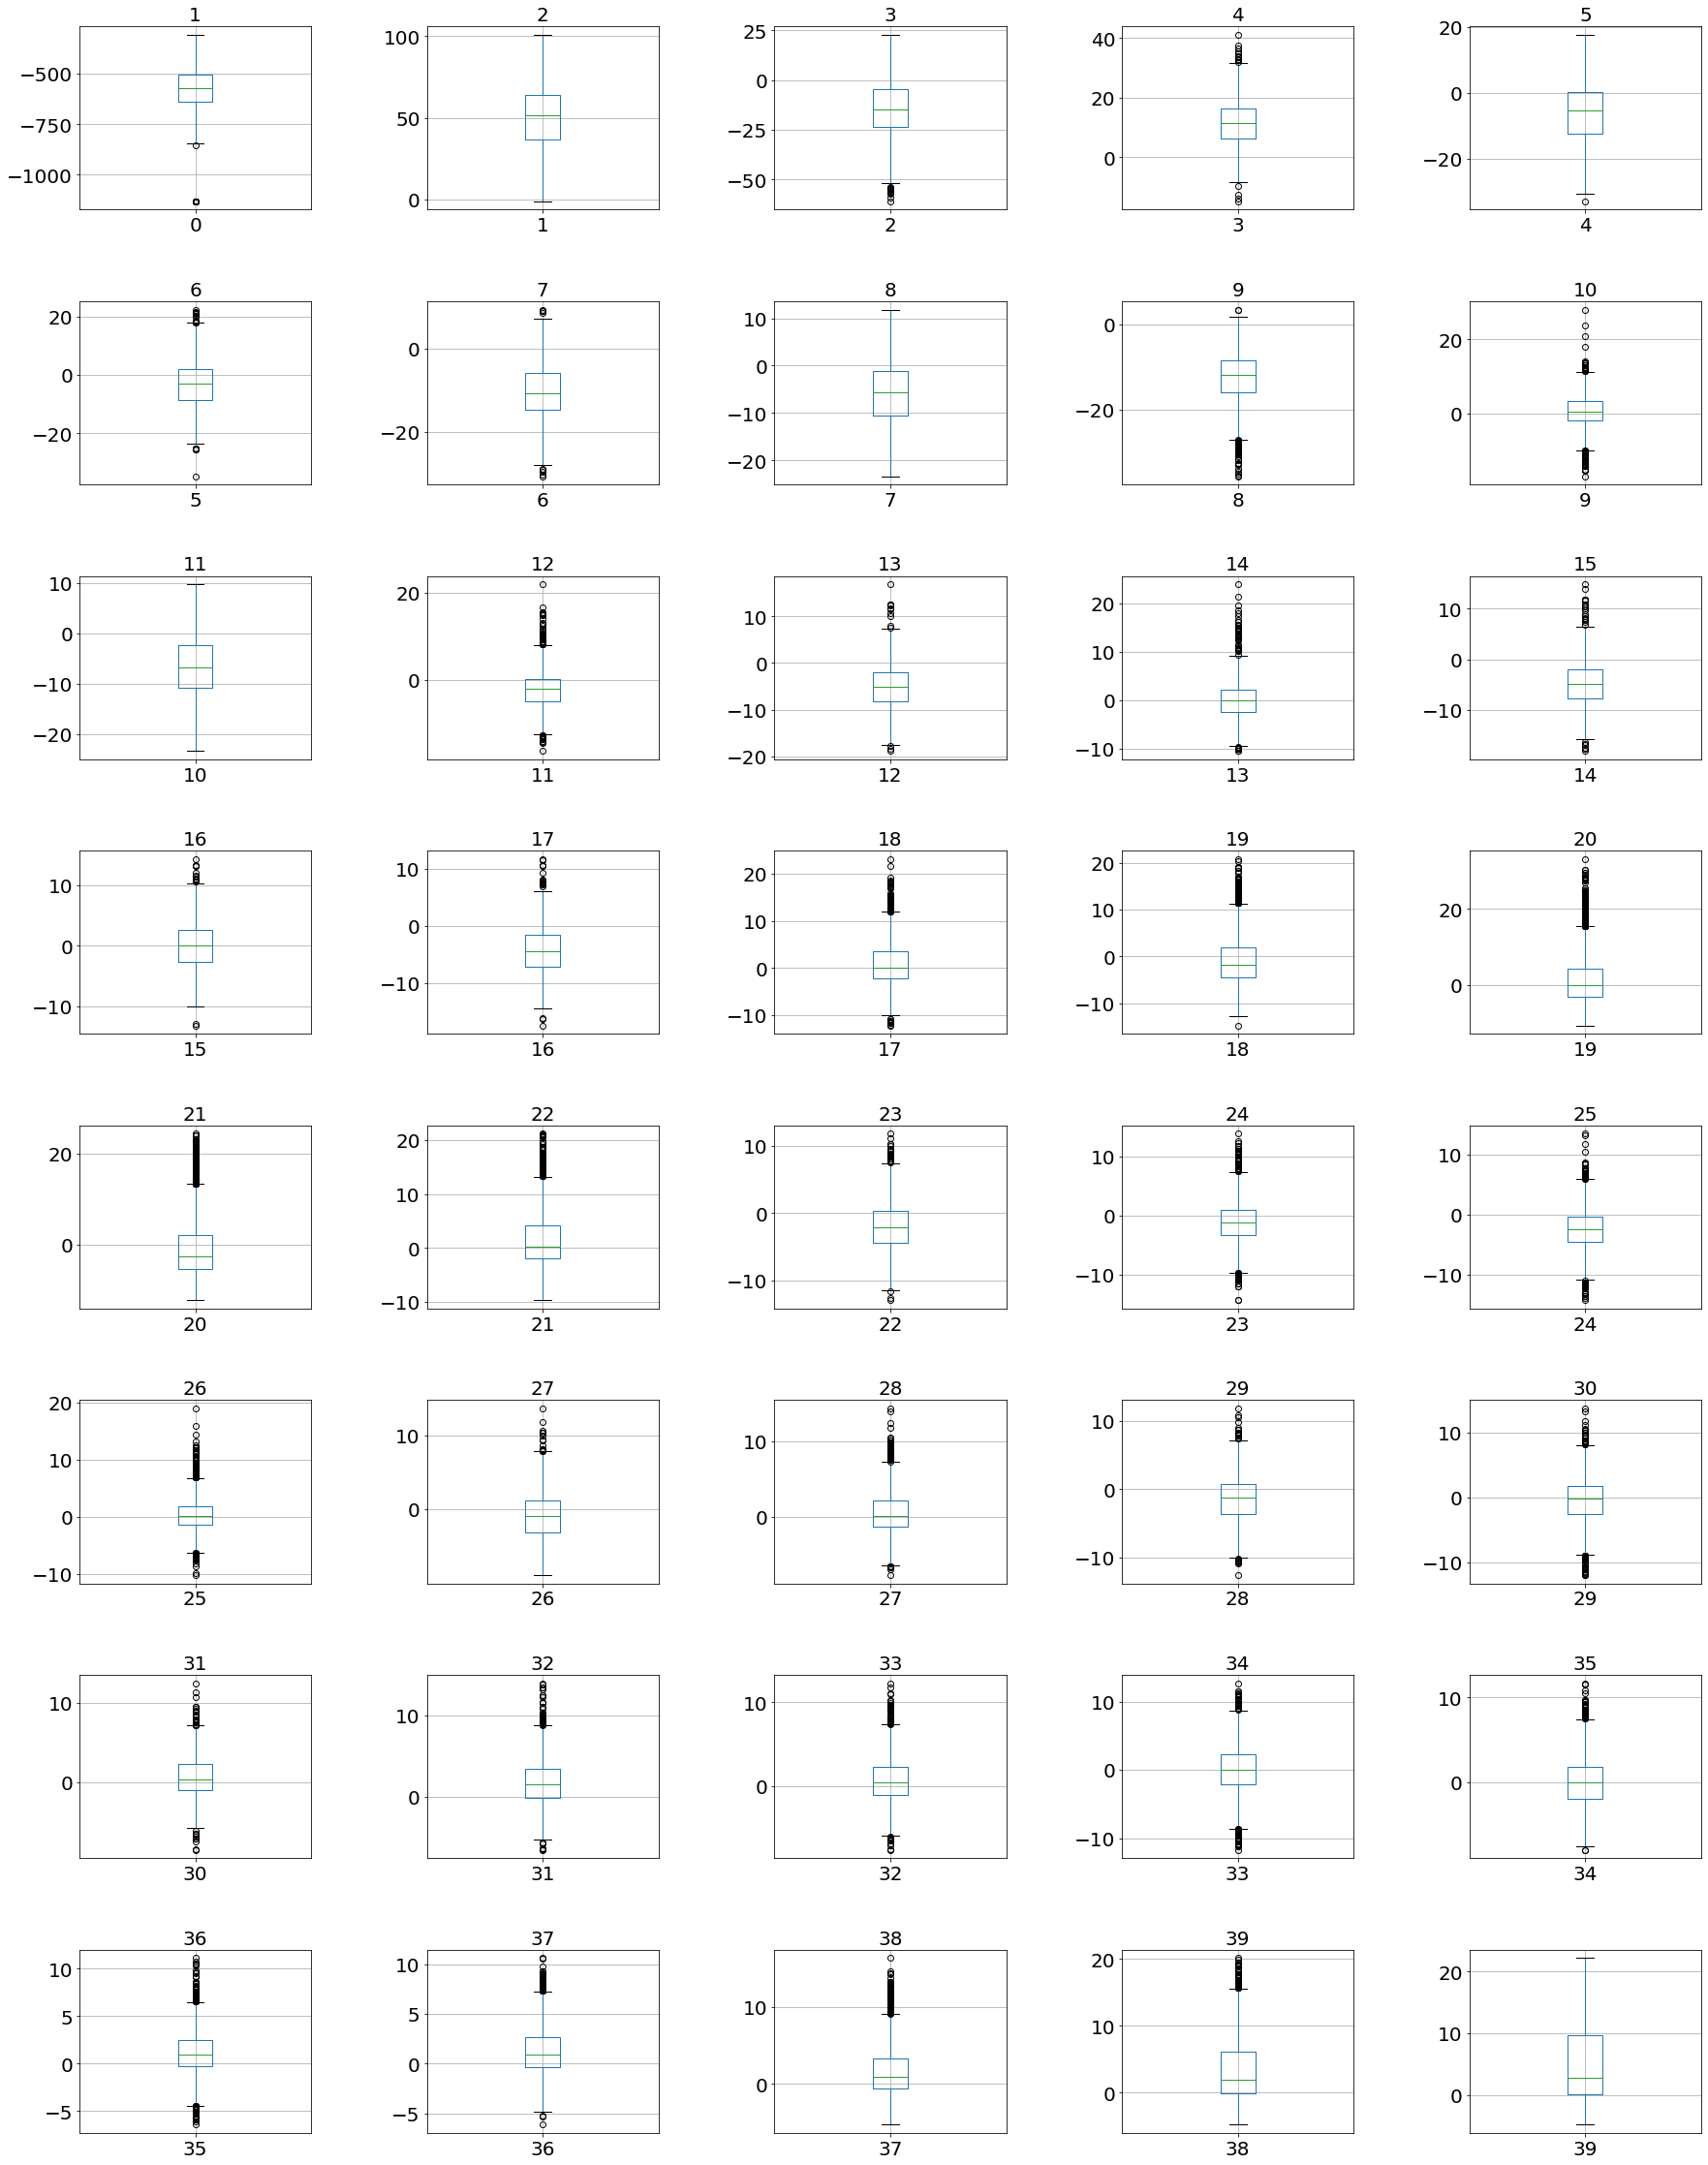

In [11]:
plt.figure(figsize=(30,40))
for i,col in enumerate(X_df):
    plt.title(i, fontsize=20)
    plt.subplot(8,5,i+1)
    X_df[[col]].boxplot(fontsize=20)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

### We can notice outliers in these features- 

- 0- <-1000
- 6- <-10
- 10- >20
- 12 >20
- 25 >10
- 26 >15


### We'll replace the outliers with median:

In [12]:
median = X_df.loc[X_df[0] > -1000, 0].median()
X_df.loc[X_df[0] < -1000, 0] = np.nan
X_df[0].fillna(median,inplace=True)

median = X_df.loc[X_df[6] > -1000, 6].median()
X_df.loc[X_df[6] < -1000, 6] = np.nan
X_df[6].fillna(median,inplace=True)

median = X_df.loc[X_df[10] > -1000, 10].median()
X_df.loc[X_df[10] < -1000, 10] = np.nan
X_df[10].fillna(median,inplace=True)

median = X_df.loc[X_df[12] > -1000, 12].median()
X_df.loc[X_df[12] < -1000,12] = np.nan
X_df[12].fillna(median,inplace=True)

median = X_df.loc[X_df[25] > -1000, 25].median()
X_df.loc[X_df[25] < -1000, 25] = np.nan
X_df[25].fillna(median,inplace=True)

median = X_df.loc[X_df[26] > -1000, 26].median()
X_df.loc[X_df[26] < -1000, 26] = np.nan
X_df[26].fillna(median,inplace=True)

### At this point, we can perform a normal classification, using our mfccs coefficients as our features.

### We'll start by running a Logistic regression model.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, \
                                                    random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=150).fit(X_train, y_train)
y_pred = clf.predict(X_test)


C:\Users\Talba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.40      0.52        40
           2       0.46      0.51      0.48        81
           3       0.54      0.56      0.55        85
           4       0.46      0.56      0.50        73
           5       0.60      0.70      0.65        79
           6       0.64      0.62      0.63        90
           7       0.47      0.38      0.42        39
           8       0.40      0.26      0.31        39

    accuracy                           0.54       526
   macro avg       0.54      0.50      0.51       526
weighted avg       0.54      0.54      0.53       526



### Running RandomForest:

In [16]:
from sklearn.ensemble import RandomForestClassifier

reg = RandomForestClassifier()
reg.fit(X_train, y_train)
y_pred2 = reg.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.90      0.65      0.75        40
           2       0.64      0.89      0.75        81
           3       0.78      0.61      0.68        85
           4       0.66      0.73      0.69        73
           5       0.79      0.75      0.77        79
           6       0.80      0.76      0.78        90
           7       0.74      0.59      0.66        39
           8       0.45      0.54      0.49        39

    accuracy                           0.71       526
   macro avg       0.72      0.69      0.70       526
weighted avg       0.73      0.71      0.71       526



In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred3 = gnb.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           1       0.45      0.38      0.41        40
           2       0.60      0.40      0.48        81
           3       0.61      0.40      0.48        85
           4       0.45      0.29      0.35        73
           5       0.68      0.49      0.57        79
           6       0.60      0.34      0.44        90
           7       0.20      0.62      0.30        39
           8       0.24      0.64      0.34        39

    accuracy                           0.42       526
   macro avg       0.48      0.44      0.42       526
weighted avg       0.52      0.42      0.44       526



### We'll try KNN, and therefore we'll scale the features before:

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scale, y_train)
y_pred4 = knn.predict(X_test_scale)

In [22]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           1       0.52      0.82      0.64        40
           2       0.84      0.83      0.83        81
           3       0.67      0.74      0.70        85
           4       0.75      0.67      0.71        73
           5       0.71      0.82      0.76        79
           6       0.85      0.62      0.72        90
           7       0.91      0.54      0.68        39
           8       0.67      0.74      0.71        39

    accuracy                           0.73       526
   macro avg       0.74      0.72      0.72       526
weighted avg       0.75      0.73      0.73       526



### We can notice we reached the best scores using either the RandomForset or KNN algorithms, seems like linear models don't fit our data very well

### Running basic neural network:

In [23]:
X_train.shape

(2102, 40)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense


model = Sequential(
    [
     layers.Dense(256, activation="sigmoid", input_dim = 40),
     layers.Dense(64, activation="relu"),
     layers.Dense(8, activation="softmax")
    ]
)


In [25]:
model.input_shape, model.output_shape

((None, 40), (None, 8))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               10496     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
Total params: 27,464
Trainable params: 27,464
Non-trainable params: 0
_________________________________________________________________


### We'll reduce eac label by one, so that our labels range between 0 - 7 instead of 1 - 8; That way we can fit them into our model which expects final outputs in this range.

In [27]:
y_train = y_train - 1
y_test = y_test - 1

In [29]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7}

In [36]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
model.fit(X_train, y_train, validation_split=0.1, batch_size=16, epochs=500)

Epoch 1/500
119/119 [==============================] - 1s 4ms/step - loss: 0.1197 - accuracy: 0.9522 - val_loss: 1.9800 - val_accuracy: 0.6351
Epoch 2/500
119/119 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9417 - val_loss: 2.3756 - val_accuracy: 0.6445
Epoch 3/500
119/119 [==============================] - 0s 2ms/step - loss: 0.1718 - accuracy: 0.9327 - val_loss: 2.0302 - val_accuracy: 0.6635
Epoch 4/500
119/119 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9455 - val_loss: 1.9600 - val_accuracy: 0.6919
Epoch 5/500
119/119 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.9492 - val_loss: 2.1258 - val_accuracy: 0.6209
Epoch 6/500
119/119 [==============================] - 0s 2ms/step - loss: 0.1308 - accuracy: 0.9475 - val_loss: 2.1504 - val_accuracy: 0.6351
Epoch 7/500
119/119 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.9375 - val_loss: 1.8861 - val_accuracy: 0.6540

In [37]:
print("Evaluating on the test data")
results = model.evaluate(X_test, y_test, batch_size=20)
print("test loss, test acc:", results)

Evaluating on the test data
27/27 [==============================] - 0s 1ms/step - loss: 2.4268 - accuracy: 0.6350
test loss, test acc: [2.4267871379852295, 0.6349809765815735]


### Seems like our model doesn't really improve, and get's stuch around the 64% mark. We'll try a CNN network which are known to work with Speech recognision problems:

### First we'll add another dimension to our data in order for it to fit the model:

In [39]:
x_train_new = np.expand_dims(X_train, axis=2)
x_test_new = np.expand_dims(X_test, axis=2)

In [62]:
x_train_new.shape, x_test_new.shape

((2102, 40, 1), (526, 40, 1))

In [84]:
model2 = Sequential(
    [
     layers.Conv1D(128, 3, activation='relu', input_shape=(40,1)),
     layers.MaxPooling1D(),
     layers.Conv1D(128, 3, activation='relu'),
     layers.MaxPooling1D(),
     layers.Conv1D(128, 3, activation='relu'),
     layers.MaxPooling1D(),
     layers.Flatten(),
     layers.Dense(64, activation="relu"),
     layers.Dense(8, activation="softmax")
    ]
)


In [85]:
model2.input_shape, model2.output.shape

((None, 40, 1), TensorShape([None, 8]))

In [86]:
model2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 38, 128)           512       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 19, 128)           0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 17, 128)           49280     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 8, 128)            0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 6, 128)            49280     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 3, 128)            0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 384)             

In [92]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
model2.fit(x_train_new, y_train, validation_split=0.1, batch_size=16, epochs=10)

Epoch 1/10
119/119 [==============================] - 1s 7ms/step - loss: 0.1209 - accuracy: 0.9524 - val_loss: 1.9974 - val_accuracy: 0.6635
Epoch 2/10
119/119 [==============================] - 1s 5ms/step - loss: 0.1593 - accuracy: 0.9325 - val_loss: 1.8278 - val_accuracy: 0.6777
Epoch 3/10
119/119 [==============================] - 1s 5ms/step - loss: 0.2298 - accuracy: 0.9258 - val_loss: 1.7046 - val_accuracy: 0.6588
Epoch 4/10
119/119 [==============================] - 1s 5ms/step - loss: 0.0818 - accuracy: 0.9688 - val_loss: 1.8895 - val_accuracy: 0.6825
Epoch 5/10
119/119 [==============================] - 1s 5ms/step - loss: 0.0806 - accuracy: 0.9666 - val_loss: 1.7779 - val_accuracy: 0.7156
Epoch 6/10
119/119 [==============================] - 1s 5ms/step - loss: 0.0807 - accuracy: 0.9649 - val_loss: 1.7603 - val_accuracy: 0.7156
Epoch 7/10
119/119 [==============================] - 1s 5ms/step - loss: 0.0647 - accuracy: 0.9711 - val_loss: 1.7878 - val_accuracy: 0.7109
Epoch 

In [93]:
print("Evaluating on the test data")
results = model2.evaluate(x_test_new, y_test, batch_size=100)
print("test loss, test acc:", results)

Evaluating on the test data
6/6 [==============================] - 0s 5ms/step - loss: 1.8146 - accuracy: 0.6958
test loss, test acc: [1.8145948648452759, 0.6958174705505371]
